In [56]:
# !git clone git@github.com:cisagov/vulnrichment.git    

https://github.com/cisagov/vulnrichment/pull/62

In [57]:
import os
import json
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


## Read JSON ADP SSVC Values into a df

In [58]:
root_directory = '../tmp/vulnrichment'

In [59]:

def extract_metrics_from_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
        metrics = {}
        cve_id = os.path.splitext(os.path.basename(file_path))[0]  # Extract filename without extension as cveId
        metrics['cve'] = cve_id  # Store cveId in metrics dictionary
        containers = data.get('containers', {})
        for adp_data in containers.get('adp', []):
            metrics_data = adp_data.get('metrics', [])
            for metric in metrics_data:
                other = metric.get('other', {})
                content = other.get('content', {})
                if content.get('id') == cve_id:
                    for option in content.get('options', []):
                        if 'Exploitation' in option:
                            metrics['Exploitation'] = option['Exploitation']
                        if 'Automatable' in option:
                            metrics['Automatable'] = option['Automatable']
                        if 'Technical Impact' in option:
                            metrics['Technical Impact'] = option['Technical Impact']

        # Extract vectorString from 'cvssV3_1' section under 'adp'
        adp_section = containers.get('adp', [])
        if adp_section:
            for metric in adp_section[0].get('metrics', []):
                cvssV3_1 = metric.get('cvssV3_1', {})
                if cvssV3_1:
                    metrics['vectorString'] = cvssV3_1.get('vectorString', '')
        
        return metrics

def extract_metrics_from_directory(root_dir):
    all_metrics = []
    for root, _, files in os.walk(root_dir):
        for file_name in files:
            if file_name.endswith('.json'):
                file_path = os.path.join(root, file_name)
                metrics = extract_metrics_from_json(file_path)
                if metrics:
                    all_metrics.append(metrics)
    return all_metrics

metrics_list = extract_metrics_from_directory(root_directory)

# Convert list of dictionaries to DataFrame
df = pd.DataFrame(metrics_list)

# Reorder columns to have 'cveId' as the first column
if 'cve' in df.columns:
    df = df[['cve', 'vectorString', 'Exploitation', 'Automatable', 'Technical Impact']]

# Display the DataFrame (you can manipulate it further as needed)
df


,cve,vectorString,Exploitation,Automatable,Technical Impact
0,CVE-2013-7030,NaN,none,no,partial
1,CVE-2013-3245,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:L/I:L/A:L,poc,no,partial
2,CVE-2014-9426,NaN,none,no,partial
3,CVE-2014-0808,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:N,none,yes,total
4,CVE-2014-5470,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,poc,yes,total
...,...,...,...,...,...
10959,CVE-2011-0611,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,active,no,total
10960,CVE-2011-0737,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:L/I:N/A:N,none,no,partial
10961,CVE-2016-6531,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,none,yes,total
10962,CVE-2016-3721,CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:N/I:L/A:N,none,no,partial


In [60]:
# Rename 'Technical Impact' to 'TechnicalImpact'
df.rename(columns={'Technical Impact': 'TechnicalImpact'}, inplace=True)
df

,cve,vectorString,Exploitation,Automatable,TechnicalImpact
0,CVE-2013-7030,NaN,none,no,partial
1,CVE-2013-3245,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:L/I:L/A:L,poc,no,partial
2,CVE-2014-9426,NaN,none,no,partial
3,CVE-2014-0808,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:N,none,yes,total
4,CVE-2014-5470,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,poc,yes,total
...,...,...,...,...,...
10959,CVE-2011-0611,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,active,no,total
10960,CVE-2011-0737,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:L/I:N/A:N,none,no,partial
10961,CVE-2016-6531,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,none,yes,total
10962,CVE-2016-3721,CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:N/I:L/A:N,none,no,partial


In [61]:
df.vectorString.value_counts().sum()

1306

## Check Values
The values are mixed case - so convert all to Title case

In [62]:
df.Exploitation.value_counts()

none      9639
poc       1130
active      66
None        57
Active      19
PoC         11
Name: Exploitation, dtype: int64

In [63]:
df.Automatable.value_counts()

no     9473
yes    1360
No       56
Yes      33
Name: Automatable, dtype: int64

In [64]:
df['TechnicalImpact'].value_counts()

partial    7690
total      3143
Total        85
Partial       4
Name: TechnicalImpact, dtype: int64

In [84]:
# Convert values in 'Exploitation', 'Automatable', 'TechnicalImpact' columns to lower case
df['Exploitation'] = df['Exploitation'].apply(lambda x: x.lower() if isinstance(x, str) else x)
df['Automatable'] = df['Automatable'].apply(lambda x: x.lower() if isinstance(x, str) else x)
df['TechnicalImpact'] = df['TechnicalImpact'].apply(lambda x: x.lower() if isinstance(x, str) else x)


In [66]:
df.Exploitation.value_counts()

None      9696
Poc       1141
Active      85
Name: Exploitation, dtype: int64

In [67]:
df.Automatable.value_counts()

No     9529
Yes    1393
Name: Automatable, dtype: int64

In [68]:
df['TechnicalImpact'].value_counts()

Partial    7694
Total      3228
Name: TechnicalImpact, dtype: int64

## Get CVSS Base Parameters

Several JSON files don't have CVSS base parameters or score e.g.
* vulnrichment/2024/22xxx/CVE-2024-22365.json 
* vulnrichment/2018/20xxx/CVE-2018-20735.json

````
find . -type f -name "*.json" -exec grep -H "baseScore" {} + | wc -l
9425
````

So use a different source for these.


In [69]:
URL="https://raw.githubusercontent.com/t0sche/cvss-bt/main/cvss-bt.csv"
df_cvss = pd.read_csv(URL)
df_cvss

/var/folders/ss/mvst4cws5c9dzhhthv64hhzr0000gq/T/ipykernel_63386/271777378.py:2: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



,cve,cvss-bt_score,cvss-bt_severity,cvss-bt_vector,cvss_version,base_score,base_severity,base_vector,assigner,published_date,epss,cisa_kev,vulncheck_kev,exploitdb,metasploit,nuclei,poc_github
0,CVE-1999-0095,9.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:POC,2.0,10.0,NaN,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1988-10-01T04:00Z,0.07764,False,False,True,False,False,False
1,CVE-1999-0082,8.5,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,10.0,NaN,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1988-11-11T05:00Z,0.015,False,False,False,False,False,False
2,CVE-1999-1471,6.1,MEDIUM,AV:L/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,7.2,NaN,AV:L/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1989-01-01T05:00Z,0.00043,False,False,False,False,False,False
3,CVE-1999-1122,3.9,LOW,AV:L/AC:L/Au:N/C:P/I:P/A:P/E:U,2.0,4.6,NaN,AV:L/AC:L/Au:N/C:P/I:P/A:P,cve@mitre.org,1989-07-26T04:00Z,0.0006,False,False,False,False,False,False
4,CVE-1999-1467,8.5,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,10.0,NaN,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1989-10-26T04:00Z,0.00299,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255282,CVE-2024-5728,UNKNOWN,UNKNOWN,N/A/E:U,NaN,NaN,NaN,NaN,contact@wpscan.com,2024-06-28T06:15Z,0.00043,False,False,False,False,False,False
255283,CVE-2024-5727,UNKNOWN,UNKNOWN,N/A/E:U,NaN,NaN,NaN,NaN,contact@wpscan.com,2024-06-28T06:15Z,0.00043,False,False,False,False,False,False
255284,CVE-2024-5570,UNKNOWN,UNKNOWN,N/A/E:U,NaN,NaN,NaN,NaN,contact@wpscan.com,2024-06-28T06:15Z,0.00043,False,False,False,False,False,False
255285,CVE-2023-47803,UNKNOWN,UNKNOWN,N/A/E:U,NaN,NaN,NaN,NaN,security@synology.com,2024-06-28T06:15Z,0.00043,False,False,False,False,False,False


In [70]:
# Merge df and df_cvss on 'cveId', adding 'base_vector' column from df_cvss to df
df_merged = pd.merge(df, df_cvss[['cve', 'base_vector', 'cisa_kev', 'nuclei', 'metasploit', 'exploitdb', 'poc_github']], on='cve', how='left')
df_merged

,cve,vectorString,Exploitation,Automatable,TechnicalImpact,base_vector,cisa_kev,nuclei,metasploit,exploitdb,poc_github
0,CVE-2013-7030,NaN,None,No,Partial,AV:N/AC:L/Au:N/C:P/I:N/A:N,False,False,False,True,False
1,CVE-2013-3245,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:L/I:L/A:L,Poc,No,Partial,AV:N/AC:M/Au:N/C:P/I:P/A:P,False,False,False,False,False
2,CVE-2014-9426,NaN,None,No,Partial,AV:N/AC:L/Au:N/C:P/I:P/A:P,False,False,False,False,False
3,CVE-2014-0808,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:N,None,Yes,Total,AV:N/AC:L/Au:N/C:P/I:N/A:N,False,False,False,False,False
4,CVE-2014-5470,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,Poc,Yes,Total,NaN,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
10959,CVE-2011-0611,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,Active,No,Total,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,True,False,True,True,False
10960,CVE-2011-0737,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:L/I:N/A:N,None,No,Partial,AV:N/AC:L/Au:N/C:P/I:N/A:N,False,False,False,False,False
10961,CVE-2016-6531,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,None,Yes,Total,CVSS:3.0/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,False,False,False,False,False
10962,CVE-2016-3721,CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:N/I:L/A:N,None,No,Partial,CVSS:3.0/AV:N/AC:L/PR:L/UI:N/S:U/C:N/I:H/A:N,False,False,False,False,False


In [71]:
df_valid = df_merged.dropna(subset=['vectorString', 'base_vector'])

# Compare vectorString with base_vector
df_valid['vectorString_matches_base'] = df_valid['vectorString'] == df_valid['base_vector']
df_valid

/var/folders/ss/mvst4cws5c9dzhhthv64hhzr0000gq/T/ipykernel_63386/2659700914.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cve,vectorString,Exploitation,Automatable,TechnicalImpact,base_vector,cisa_kev,nuclei,metasploit,exploitdb,poc_github,vectorString_matches_base
1,CVE-2013-3245,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:L/I:L/A:L,Poc,No,Partial,AV:N/AC:M/Au:N/C:P/I:P/A:P,False,False,False,False,False,False
3,CVE-2014-0808,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:N,None,Yes,Total,AV:N/AC:L/Au:N/C:P/I:N/A:N,False,False,False,False,False,False
9,CVE-2022-3038,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,Active,No,Total,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,True,False,False,False,False,True
22,CVE-2022-25481,CVSS:3.1/AV:L/AC:L/PR:N/UI:N/S:U/C:L/I:N/A:N,Poc,No,Partial,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:N/A:N,False,True,False,False,False,False
24,CVE-2022-40824,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,None,Yes,Total,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
10959,CVE-2011-0611,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,Active,No,Total,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,True,False,True,True,False,True
10960,CVE-2011-0737,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:L/I:N/A:N,None,No,Partial,AV:N/AC:L/Au:N/C:P/I:N/A:N,False,False,False,False,False,False
10961,CVE-2016-6531,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,None,Yes,Total,CVSS:3.0/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,False,False,False,False,False,False
10962,CVE-2016-3721,CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:N/I:L/A:N,None,No,Partial,CVSS:3.0/AV:N/AC:L/PR:L/UI:N/S:U/C:N/I:H/A:N,False,False,False,False,False,False


In [72]:
df_merged['base_vector'].isna().sum()

8236

# Drop rows with NaN values in 'base_vector' column
df_merged.dropna(subset=['base_vector'], inplace=True)
df_merged

In [73]:
def exploitation_dt(row):
    if row['cisa_kev']:
        return "Active"
    elif (row['exploitdb'] | row['poc_github'] | row['nuclei'] | row['metasploit']):
    #elif (row['exploitdb'] | row['poc_github'] ):
        return "Poc"
    else:
        return "None"

In [74]:
df_merged['_Exploitation'] = df_merged.apply(exploitation_dt, axis=1)
df_merged


,cve,vectorString,Exploitation,Automatable,TechnicalImpact,base_vector,cisa_kev,nuclei,metasploit,exploitdb,poc_github,_Exploitation
0,CVE-2013-7030,NaN,None,No,Partial,AV:N/AC:L/Au:N/C:P/I:N/A:N,False,False,False,True,False,Poc
1,CVE-2013-3245,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:L/I:L/A:L,Poc,No,Partial,AV:N/AC:M/Au:N/C:P/I:P/A:P,False,False,False,False,False,None
2,CVE-2014-9426,NaN,None,No,Partial,AV:N/AC:L/Au:N/C:P/I:P/A:P,False,False,False,False,False,None
3,CVE-2014-0808,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:N,None,Yes,Total,AV:N/AC:L/Au:N/C:P/I:N/A:N,False,False,False,False,False,None
4,CVE-2014-5470,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,Poc,Yes,Total,NaN,False,False,True,True,False,Poc
...,...,...,...,...,...,...,...,...,...,...,...,...
10959,CVE-2011-0611,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,Active,No,Total,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,True,False,True,True,False,Active
10960,CVE-2011-0737,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:L/I:N/A:N,None,No,Partial,AV:N/AC:L/Au:N/C:P/I:N/A:N,False,False,False,False,False,None
10961,CVE-2016-6531,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,None,Yes,Total,CVSS:3.0/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,False,False,False,False,False,None
10962,CVE-2016-3721,CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:N/I:L/A:N,None,No,Partial,CVSS:3.0/AV:N/AC:L/PR:L/UI:N/S:U/C:N/I:H/A:N,False,False,False,False,False,None


In [75]:
# Function to convert CVSS vector string to dictionary
def cvss_vector_to_dict(cvss_vector):
    cvss_dict = {}
    elements = cvss_vector.split('/')
    for element in elements:
        key, value = element.split(':')
        cvss_dict[key] = value
    return cvss_dict

# Add cvss_vector_dict column
df_merged['cvss_vector_dict'] = df_merged['base_vector'].apply(cvss_vector_to_dict)
df_merged

AttributeError: 'float' object has no attribute 'split'

# Calculate SSVC Decision Node Outputs

In [77]:
#V3 base score parameters
#https://www.first.org/cvss/v3-1/ or https://www.first.org/cvss/v3-0
#'availabilityImpact/'confidentialityImpact', 'integrityImpact'}
#Low (L)
#High (H)
#None (N)

#https://www.first.org/cvss/v2/guide
#Confidentiality/Integrity/Availability:
#None (N)
#Partial (P)
#Complete (C)

# Function to determine impact
def technical_impact_dt(cvss_dict):
    if (('CVSS' in cvss_dict and ((cvss_dict['CVSS'] == '3.1' ) | (cvss_dict['CVSS'] == '3.0')) and  (cvss_dict['C'] == 'H') and (cvss_dict['I'] == 'H')))  or (('C' in cvss_dict and cvss_dict['C'] == 'C') and ('I' in cvss_dict and cvss_dict['I'] == 'C')):
        return "Total"
    else:
        return "Partial"


In [78]:
df_merged['_Technical Impact'] = df_merged['cvss_vector_dict'].apply(technical_impact_dt)
df_merged

KeyError: 'cvss_vector_dict'

In [ ]:
# Merge df and df_cvss on 'cveId', adding 'base_vector' column from df_cvss to df
df_merged = pd.merge(df, df_cvss[['cve', 'base_vector', 'cisa_kev', 'nuclei', 'metasploit', 'exploitdb', 'poc_github']], on='cve', how='left')
df_merged

In [ ]:
def automatable_dt(cvss_dict):
 
    # ((userInteraction == 'NONE') & (attackComplexity == 'LOW') & (privilegesRequired != 'HIGH') & (attackVector == 'NETWORK')):
    if (('CVSS' in cvss_dict and ((cvss_dict['CVSS'] == '3.1') | (cvss_dict['CVSS'] == '3.0')) and  cvss_dict['UI'] == 'N' and cvss_dict['AC'] == 'L' and cvss_dict['PR'] != 'H' and cvss_dict['AV'] == 'N') or \
    (cvss_dict['AC'] == 'L' and cvss_dict['AV'] == 'N' and ('Au' in cvss_dict and cvss_dict['Au'] == 'N'))):

        return "Yes"
    else:
        return "No"

In [ ]:
def automatable_dt(cvss_dict):
 
    # ((userInteraction == 'NONE') & (attackComplexity == 'LOW') & (privilegesRequired != 'HIGH') & (attackVector == 'NETWORK')):
    if (('CVSS' in cvss_dict and ((cvss_dict['CVSS'] == '3.1') | (cvss_dict['CVSS'] == '3.0')) and  cvss_dict['UI'] == 'N' and cvss_dict['AC'] == 'L' and cvss_dict['PR'] != 'H' ) or \
    (cvss_dict['AC'] == 'L' and cvss_dict['AV'] == 'N' and ('Au' in cvss_dict and cvss_dict['Au'] == 'N'))):

        return "Yes"
    else:
        return "No"

In [ ]:
def automatable_dt(cvss_dict):
 
    # ((userInteraction == 'NONE') & (attackComplexity == 'LOW') & (privilegesRequired != 'HIGH') & (attackVector == 'NETWORK')):
    if (('CVSS' in cvss_dict and ((cvss_dict['CVSS'] == '3.1') | (cvss_dict['CVSS'] == '3.0')) and  cvss_dict['UI'] == 'N'  and cvss_dict['PR'] != 'H' ) or \
    (cvss_dict['AC'] == 'L' and cvss_dict['AV'] == 'N' and ('Au' in cvss_dict and cvss_dict['Au'] == 'N'))):

        return "Yes"
    else:
        return "No"

In [ ]:
def automatable_dt(cvss_dict):
 
    # ((userInteraction == 'NONE') & (attackComplexity == 'LOW') & (privilegesRequired != 'HIGH') & (attackVector == 'NETWORK')):
    if (('CVSS' in cvss_dict and ((cvss_dict['CVSS'] == '3.1') | (cvss_dict['CVSS'] == '3.0'))  and cvss_dict['PR'] != 'H' ) or \
    (cvss_dict['AC'] == 'L' and cvss_dict['AV'] == 'N' and ('Au' in cvss_dict and cvss_dict['Au'] == 'N'))):

        return "Yes"
    else:
        return "No"

SSVC "Automatable" takes the values "no" or "yes":
* no: Attackers cannot reliably automate steps 1-4 of the kill chain for this vulnerability. These steps are (1) reconnaissance, (2) weaponization, (3) delivery, and (4) exploitation. Reasons why a step may not be reliably automatable include: the vulnerable component is not searchable on the network, weaponization requires human direction, delivery requires channels that security configurations block, or exploitation is not reliable due to exploit-prevention techniques.●
* yes: Attackers can reliably automate steps 1-4 of the kill chain. If the vulnerability allows remote code execution or command injection, the expected response should be "yes".

In [ ]:
def automatable_dt(cvss_dict):
 
    # ((userInteraction == 'NONE') & (attackComplexity == 'LOW') & (privilegesRequired != 'HIGH') & (attackVector == 'NETWORK')):
    if (('CVSS' in cvss_dict and ((cvss_dict['CVSS'] == '3.1') | (cvss_dict['CVSS'] == '3.0')) and  cvss_dict['UI'] == 'N' and cvss_dict['AC'] == 'L' and cvss_dict['PR'] != 'H' ) or \
    (cvss_dict['AC'] == 'L' and cvss_dict['AV'] == 'N' and ('Au' in cvss_dict and cvss_dict['Au'] == 'N'))):

        return "Yes"
    else:
        return "No"

In [ ]:
df_merged['_Automatable'] = df_merged['cvss_vector_dict'].apply(automatable_dt)
df_merged

,cve,vectorString,Exploitation,Automatable,TechnicalImpact,base_vector,cisa_kev,nuclei,metasploit,exploitdb,poc_github,_Exploitation,cvss_vector_dict,_Technical Impact,_Automatable
0,CVE-2013-7030,NaN,None,No,Partial,AV:N/AC:L/Au:N/C:P/I:N/A:N,False,False,False,True,False,Poc,"{'AV': 'N', 'AC': 'L', 'Au': 'N', 'C': 'P', 'I...",Partial,Yes
1,CVE-2013-3245,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:L/I:L/A:L,Poc,No,Partial,AV:N/AC:M/Au:N/C:P/I:P/A:P,False,False,False,False,False,None,"{'AV': 'N', 'AC': 'M', 'Au': 'N', 'C': 'P', 'I...",Partial,No
2,CVE-2014-9426,NaN,None,No,Partial,AV:N/AC:L/Au:N/C:P/I:P/A:P,False,False,False,False,False,None,"{'AV': 'N', 'AC': 'L', 'Au': 'N', 'C': 'P', 'I...",Partial,Yes
3,CVE-2014-0808,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:N,None,Yes,Total,AV:N/AC:L/Au:N/C:P/I:N/A:N,False,False,False,False,False,None,"{'AV': 'N', 'AC': 'L', 'Au': 'N', 'C': 'P', 'I...",Partial,Yes
5,CVE-2022-2586,NaN,Active,No,Total,CVSS:3.1/AV:L/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H,True,False,False,False,True,Active,"{'CVSS': '3.1', 'AV': 'L', 'AC': 'L', 'PR': 'L...",Total,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10959,CVE-2011-0611,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,Active,No,Total,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,True,False,True,True,False,Active,"{'CVSS': '3.1', 'AV': 'N', 'AC': 'L', 'PR': 'N...",Total,No
10960,CVE-2011-0737,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:L/I:N/A:N,None,No,Partial,AV:N/AC:L/Au:N/C:P/I:N/A:N,False,False,False,False,False,None,"{'AV': 'N', 'AC': 'L', 'Au': 'N', 'C': 'P', 'I...",Partial,Yes
10961,CVE-2016-6531,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,None,Yes,Total,CVSS:3.0/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,False,False,False,False,False,None,"{'CVSS': '3.0', 'AV': 'N', 'AC': 'L', 'PR': 'N...",Total,Yes
10962,CVE-2016-3721,CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:N/I:L/A:N,None,No,Partial,CVSS:3.0/AV:N/AC:L/PR:L/UI:N/S:U/C:N/I:H/A:N,False,False,False,False,False,None,"{'CVSS': '3.0', 'AV': 'N', 'AC': 'L', 'PR': 'L...",Partial,Yes


In [ ]:
df_merged.dropna(subset=['Exploitation', '_Exploitation'], inplace=True)
df_merged

,cve,vectorString,Exploitation,Automatable,TechnicalImpact,base_vector,cisa_kev,nuclei,metasploit,exploitdb,poc_github,_Exploitation,cvss_vector_dict,_Technical Impact,_Automatable
0,CVE-2013-7030,NaN,None,No,Partial,AV:N/AC:L/Au:N/C:P/I:N/A:N,False,False,False,True,False,Poc,"{'AV': 'N', 'AC': 'L', 'Au': 'N', 'C': 'P', 'I...",Partial,Yes
1,CVE-2013-3245,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:L/I:L/A:L,Poc,No,Partial,AV:N/AC:M/Au:N/C:P/I:P/A:P,False,False,False,False,False,None,"{'AV': 'N', 'AC': 'M', 'Au': 'N', 'C': 'P', 'I...",Partial,No
2,CVE-2014-9426,NaN,None,No,Partial,AV:N/AC:L/Au:N/C:P/I:P/A:P,False,False,False,False,False,None,"{'AV': 'N', 'AC': 'L', 'Au': 'N', 'C': 'P', 'I...",Partial,Yes
3,CVE-2014-0808,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:N,None,Yes,Total,AV:N/AC:L/Au:N/C:P/I:N/A:N,False,False,False,False,False,None,"{'AV': 'N', 'AC': 'L', 'Au': 'N', 'C': 'P', 'I...",Partial,Yes
5,CVE-2022-2586,NaN,Active,No,Total,CVSS:3.1/AV:L/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H,True,False,False,False,True,Active,"{'CVSS': '3.1', 'AV': 'L', 'AC': 'L', 'PR': 'L...",Total,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10959,CVE-2011-0611,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,Active,No,Total,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,True,False,True,True,False,Active,"{'CVSS': '3.1', 'AV': 'N', 'AC': 'L', 'PR': 'N...",Total,No
10960,CVE-2011-0737,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:L/I:N/A:N,None,No,Partial,AV:N/AC:L/Au:N/C:P/I:N/A:N,False,False,False,False,False,None,"{'AV': 'N', 'AC': 'L', 'Au': 'N', 'C': 'P', 'I...",Partial,Yes
10961,CVE-2016-6531,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,None,Yes,Total,CVSS:3.0/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,False,False,False,False,False,None,"{'CVSS': '3.0', 'AV': 'N', 'AC': 'L', 'PR': 'N...",Total,Yes
10962,CVE-2016-3721,CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:N/I:L/A:N,None,No,Partial,CVSS:3.0/AV:N/AC:L/PR:L/UI:N/S:U/C:N/I:H/A:N,False,False,False,False,False,None,"{'CVSS': '3.0', 'AV': 'N', 'AC': 'L', 'PR': 'L...",Partial,Yes


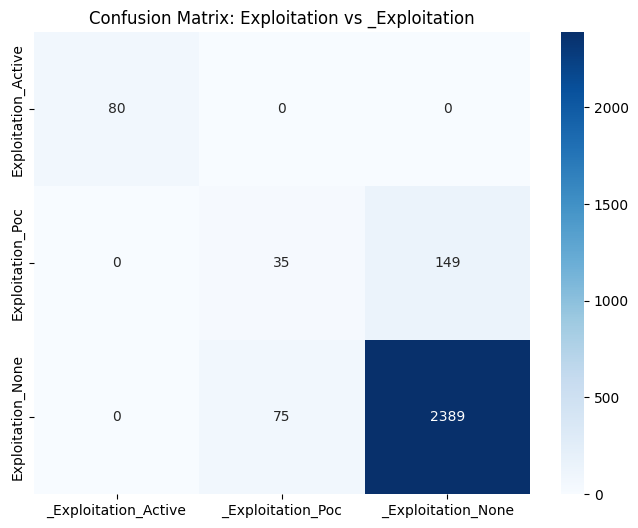

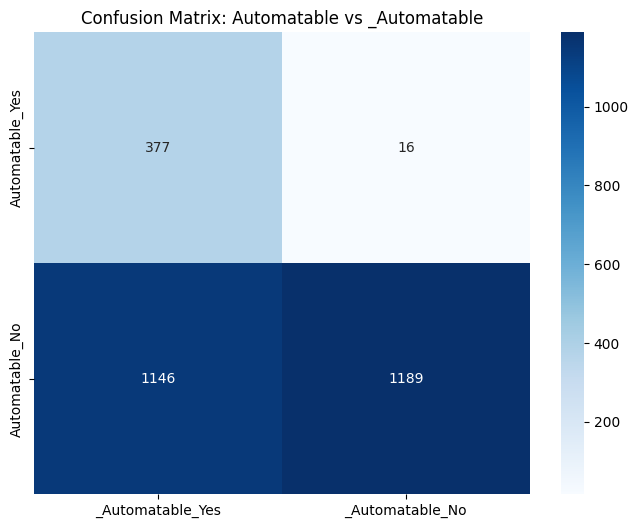

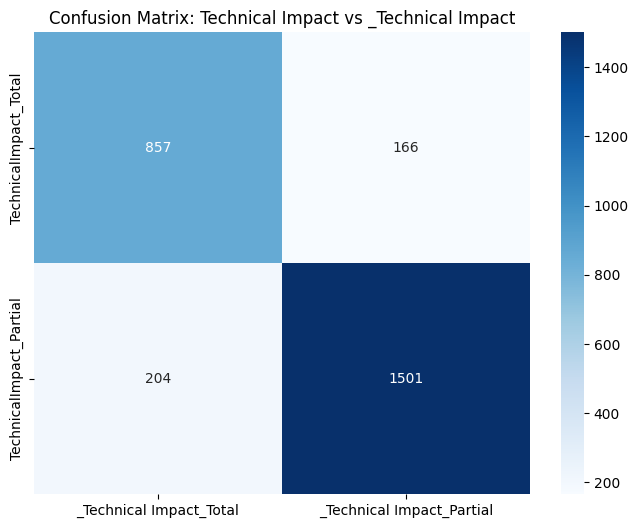

In [ ]:

# Define a function to plot confusion matrix
def plot_confusion_matrix(df, col1, col2, labels, title):
    conf_matrix = confusion_matrix(df[col1], df[col2], labels=labels)
    conf_matrix_df = pd.DataFrame(conf_matrix, index=[f'{col1}_{label}' for label in labels],
                                  columns=[f'{col2}_{label}' for label in labels])
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.show()

# Plotting confusion matrices for the specified columns
plot_confusion_matrix(df_merged, 'Exploitation', '_Exploitation', ['Active', 'Poc', 'None'], 'Confusion Matrix: Exploitation vs _Exploitation')
plot_confusion_matrix(df_merged, 'Automatable', '_Automatable', ['Yes', 'No'], 'Confusion Matrix: Automatable vs _Automatable')
plot_confusion_matrix(df_merged, 'TechnicalImpact', '_Technical Impact', ['Total', 'Partial'], 'Confusion Matrix: Technical Impact vs _Technical Impact')

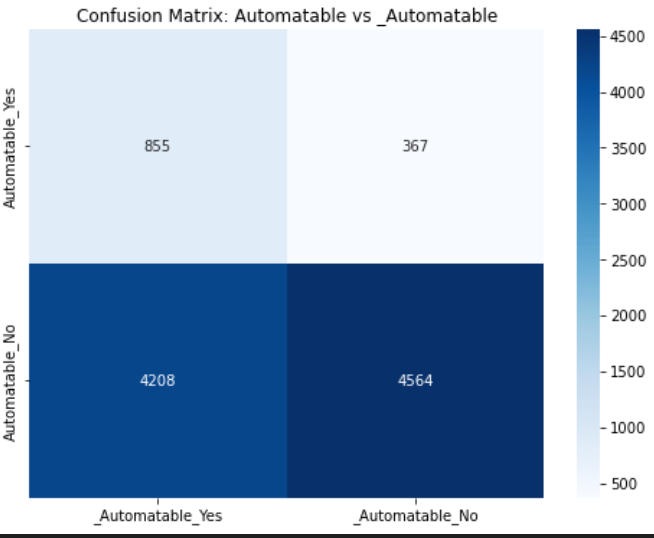

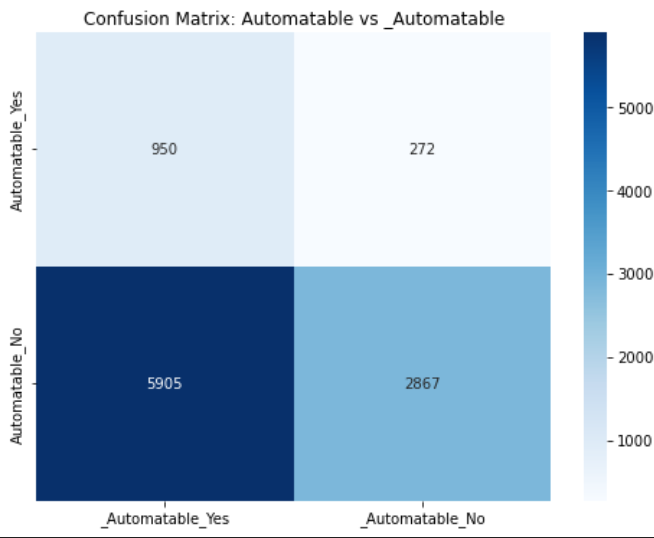


# Correlation of Parameters

In [ ]:
print(df_merged.cvss_vector_dict.head(10))

0     {'AV': 'N', 'AC': 'L', 'Au': 'N', 'C': 'P', 'I...
1     {'AV': 'N', 'AC': 'M', 'Au': 'N', 'C': 'P', 'I...
2     {'AV': 'N', 'AC': 'L', 'Au': 'N', 'C': 'P', 'I...
3     {'AV': 'N', 'AC': 'L', 'Au': 'N', 'C': 'P', 'I...
5     {'CVSS': '3.1', 'AV': 'L', 'AC': 'L', 'PR': 'L...
6     {'CVSS': '3.1', 'AV': 'N', 'AC': 'L', 'PR': 'N...
7     {'CVSS': '3.1', 'AV': 'N', 'AC': 'L', 'PR': 'L...
8     {'CVSS': '3.1', 'AV': 'N', 'AC': 'L', 'PR': 'N...
9     {'CVSS': '3.1', 'AV': 'N', 'AC': 'L', 'PR': 'N...
10    {'CVSS': '3.1', 'AV': 'N', 'AC': 'L', 'PR': 'L...
Name: cvss_vector_dict, dtype: object


In [ ]:
# Define a function to parse the CVSS vector
def parse_cvss_vector(vector):
    elements = vector.split('/')
    version = None
    metrics = {}
    
    # Check if the first element is the version
    if elements[0].startswith('CVSS'):
        version = elements[0]
        elements = elements[1:]
    
    for element in elements:
        key, value = element.split(':')
        metrics[key] = value
    
    return version, metrics

# Parse the base_vector and create separate columns
df_merged['version'] = df_merged['base_vector'].apply(lambda x: parse_cvss_vector(x)[0])
df_merged['metrics'] = df_merged['base_vector'].apply(lambda x: parse_cvss_vector(x)[1])

# Normalize the metrics dictionary to separate columns
metrics_df = pd.json_normalize(df_merged['metrics'])

# Combine the original DataFrame with the metrics DataFrame
df_merged = pd.concat([df_merged, metrics_df], axis=1).drop(columns=['metrics'])
df_merged

,cve,vectorString,Exploitation,Automatable,TechnicalImpact,base_vector,cisa_kev,nuclei,metasploit,exploitdb,...,version,AV,AC,Au,C,I,A,PR,UI,S
0,CVE-2013-7030,NaN,None,No,Partial,AV:N/AC:L/Au:N/C:P/I:N/A:N,False,False,False,True,...,None,N,L,N,P,N,N,NaN,NaN,NaN
1,CVE-2013-3245,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:L/I:L/A:L,Poc,No,Partial,AV:N/AC:M/Au:N/C:P/I:P/A:P,False,False,False,False,...,None,N,M,N,P,P,P,NaN,NaN,NaN
2,CVE-2014-9426,NaN,None,No,Partial,AV:N/AC:L/Au:N/C:P/I:P/A:P,False,False,False,False,...,None,N,L,N,P,P,P,NaN,NaN,NaN
3,CVE-2014-0808,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:N,None,Yes,Total,AV:N/AC:L/Au:N/C:P/I:N/A:N,False,False,False,False,...,None,N,L,N,P,N,N,NaN,NaN,NaN
5,CVE-2022-2586,NaN,Active,No,Total,CVSS:3.1/AV:L/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H,True,False,False,False,...,CVSS:3.1,N,L,NaN,N,N,L,N,N,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,L,L,NaN,H,H,H,L,N,U
2722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,N,L,N,P,P,P,NaN,NaN,NaN
2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,N,L,NaN,H,H,H,N,R,U
2725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,N,L,NaN,H,H,H,N,N,U


### CVSS Versions
* 9919 of CVEs are CVSS 3.1.
* 262  of CVEs are CVSS 2 or earlier i.e. earlier that CVSS 3.0
* 61  of CVEs are CVSS 3.0

In [ ]:
df_merged.version.value_counts()

CVSS:3.1    2644
CVSS:3.0      67
Name: version, dtype: int64

In [ ]:
df_merged.version.isna().value_counts()

False    2711
True     1959
Name: version, dtype: int64

### Correlation of Parameters

1. Exploitation is highly correlated with CISA KEV (0.71 but not 1); this suggests not all CVEs in CISA KEV 

Takes 2 minutes

In [ ]:
ddd
df_merged = df_merged.astype(str)

# Convert categorical variables to numerical codes
df_encoded = df_merged.apply(lambda x: pd.factorize(x)[0])

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Selected Columns')
plt.show()

NameError: name 'ddd' is not defined

# See which parameters contribute most to Exploitation, Automatable, Technical Impact

In [79]:
df

,cve,vectorString,Exploitation,Automatable,TechnicalImpact
0,CVE-2013-7030,NaN,None,No,Partial
1,CVE-2013-3245,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:L/I:L/A:L,Poc,No,Partial
2,CVE-2014-9426,NaN,None,No,Partial
3,CVE-2014-0808,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:N,None,Yes,Total
4,CVE-2014-5470,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,Poc,Yes,Total
...,...,...,...,...,...
10959,CVE-2011-0611,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,Active,No,Total
10960,CVE-2011-0737,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:L/I:N/A:N,None,No,Partial
10961,CVE-2016-6531,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,None,Yes,Total
10962,CVE-2016-3721,CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:N/I:L/A:N,None,No,Partial


In [80]:
df=df_merged.copy()
df.drop(columns=['cve', 'cvss_vector_dict', 'base_vector', 'vectorString', '_Technical Impact', '_Automatable', '_Exploitation', 'version'], inplace=True)

KeyError: "['cvss_vector_dict', '_Technical Impact', '_Automatable', 'version'] not found in axis"

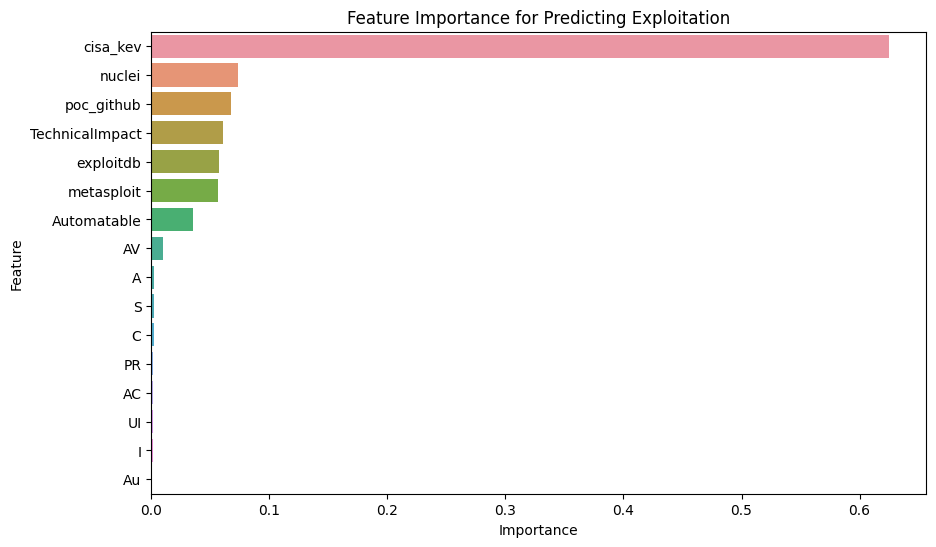

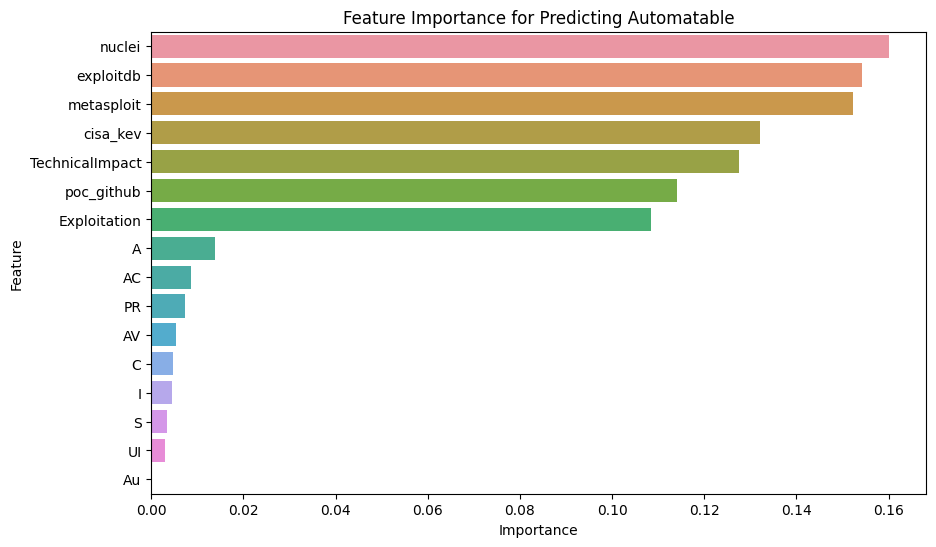

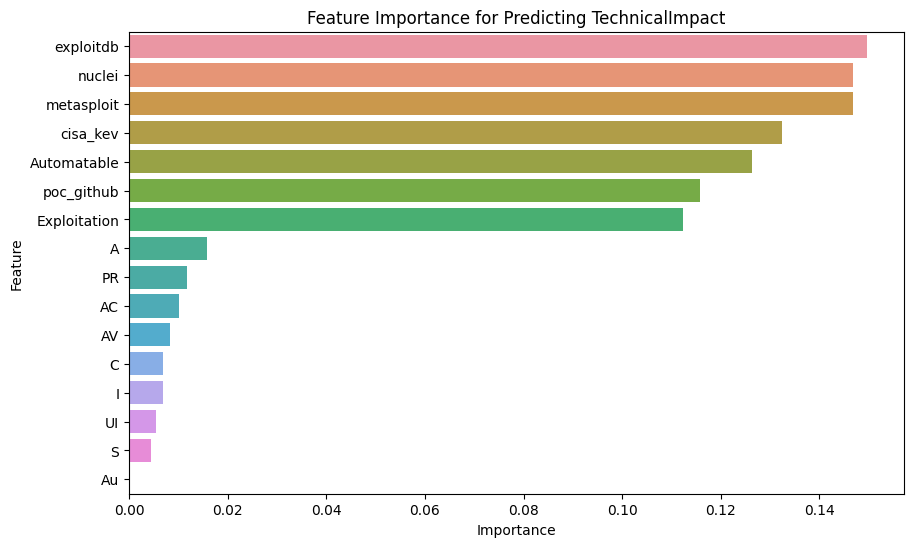

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Define a function to train a model and plot feature importance
def plot_feature_importance(df, target_column, target_value=None):
    if target_value is not None:
        target_label = label_encoders[target_column].transform([target_value])[0]
        df[target_column] = (df[target_column] == target_label).astype(int)

    X = df.drop([target_column], axis=1)
    y = df[target_column]

    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X, y)

    feature_importances = clf.feature_importances_

    features = X.columns
    importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    importances_df = importances_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importances_df)
    plt.title(f'Feature Importance for Predicting {target_column}')
    plt.show()

# Plot feature importance for each target column
plot_feature_importance(df.copy(), 'Exploitation', 'Active')
plot_feature_importance(df.copy(), 'Automatable')
plot_feature_importance(df.copy(), 'TechnicalImpact')

# CVE Impact
* Use https://huggingface.co/datasets/yahoo-inc/cve-impacts
* https://huggingface.co/datasets/yahoo-inc/cve-impacts/resolve/main/data-00000-of-00001.arrow?download=true

In [ ]:
df_impact = pd.read_csv('../data_in/impact/230K_CVE_KeyPhrases.csv', usecols=['CVE', 'KeyPhrases'])
df_impact = df_impact.rename(columns={'CVE': 'cve'})
df_impact

,cve,KeyPhrases
0,CVE-1999-0001,"['denial of service (crash or hang)', 'denial ..."
1,CVE-1999-0002,"['root access', 'buffer overflow']"
2,CVE-1999-0003,"['execute commands', 'buffer overflow']"
3,CVE-1999-0004,['mime buffer overflow']
4,CVE-1999-0005,"['arbitrary command execution', 'imap buffer o..."
...,...,...
229638,CVE-2024-3259,"['sql injection', 'public and may be used']"
229639,CVE-2024-3270,"['public and may be used', 'improper access co..."
229640,CVE-2024-3272,"['public and may be used', 'hard-coded credent..."
229641,CVE-2024-3273,['command injection']


In [81]:
# Merge df and df_cvss on 'cveId', adding 'base_vector' column from df_cvss to df
df_merged = pd.merge(df_merged, df_impact, on='cve', how='left')
df_merged

,cve,vectorString,Exploitation,Automatable,TechnicalImpact,base_vector,cisa_kev,nuclei,metasploit,exploitdb,poc_github,_Exploitation,KeyPhrases
0,CVE-2013-7030,NaN,None,No,Partial,AV:N/AC:L/Au:N/C:P/I:N/A:N,False,False,False,True,False,Poc,"['obtain sensitive information', 'cleartext us..."
1,CVE-2013-3245,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:L/I:L/A:L,Poc,No,Partial,AV:N/AC:M/Au:N/C:P/I:P/A:P,False,False,False,False,False,None,"['does not involve a register', 'integer overf..."
2,CVE-2014-9426,NaN,None,No,Partial,AV:N/AC:L/Au:N/C:P/I:P/A:P,False,False,False,False,False,None,"['unknown vectors', 'denial of service (memory..."
3,CVE-2014-0808,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:N,None,Yes,Total,AV:N/AC:L/Au:N/C:P/I:N/A:N,False,False,False,False,False,None,"['unspecified vectors', 'obtain sensitive ship..."
4,CVE-2014-5470,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,Poc,Yes,Total,NaN,False,False,True,True,False,Poc,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10960,CVE-2011-0611,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,Active,No,Total,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,True,False,True,True,False,Active,['execute arbitrary code or cause a denial of'...
10961,CVE-2011-0737,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:L/I:N/A:N,None,No,Partial,AV:N/AC:L/Au:N/C:P/I:N/A:N,False,False,False,False,False,None,"['obtain sensitive information', 'information ..."
10962,CVE-2016-6531,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,None,Yes,Total,CVSS:3.0/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,False,False,False,False,False,None,"['obtain administrative access', 'hardcoded', ..."
10963,CVE-2016-3721,CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:N/I:L/A:N,None,No,Partial,CVSS:3.0/AV:N/AC:L/PR:L/UI:N/S:U/C:N/I:H/A:N,False,False,False,False,False,None,['inject arbitrary build parameters']


In [83]:
df_merged.to_csv("../data_out/vulnrichment/cves.csv")

# ParCat Diagrams

In [ ]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    # Run code specific to Google Colab environment
    print("Running in Google Colab")
    #Download the input data file
    FILE_PATH="./cvss-bt.csv"
    URL="https://raw.githubusercontent.com/t0sche/cvss-bt/main/cvss-bt.csv"

    !if [ ! -f $FILE_PATH ]; then \
        wget -O $FILE_PATH $URL; \
    else \
        echo "File already exists: $FILE_PATH"; \
    fi
    df = pd.read_csv('./cvss-bt.csv')
else:
    # Run code for other environments
    print("Not running in Google Colab")
    df = pd.read_csv('../data_in/cvss_bt/cvss-bt.csv.gz', compression="gzip")



if IN_COLAB:
    # Run code specific to Google Colab environment
    print("Running in Google Colab")
    #Download the input data file
    DT_FILE_PATH="./DT_rbp.csv"
    DT_URL="https://raw.githubusercontent.com/RiskBasedPrioritization/RiskBasedPrioritizationAnalysis/main/cisa_ssvc_dt/DT_rbp.csv"
    !if [ ! -f $DT_FILE_PATH ]; then \
        wget -O $DT_FILE_PATH $DT_URL; \
    else \
        echo "File already exists: $DT_FILE_PATH"; \
    fi
    dt_df = pd.read_csv('./DT_rbp.csv')
else:
    # Run code for other environments
    print("Not running in Google Colab")
    dt_df = pd.read_csv('../cisa_ssvc_dt/DT_rbp.csv')

Not running in Google Colab
Not running in Google Colab


/var/folders/ss/mvst4cws5c9dzhhthv64hhzr0000gq/T/ipykernel_63386/634053555.py:19: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data_in/cvss_bt/cvss-bt.csv.gz', compression="gzip")


In [ ]:
dt_df

,Leaf,Exploitation,Automatable,TechnicalImpact,MissionWellBeing,Priority
0,1,active,yes,total,high,Act
1,2,active,yes,total,medium,Act
2,3,active,yes,total,low,Attend
3,4,active,yes,partial,high,Act
4,5,active,yes,partial,medium,Attend
5,6,active,yes,partial,low,Attend
6,7,active,no,total,high,Act
7,8,active,no,total,medium,Attend
8,9,active,no,total,low,Track
9,10,active,no,partial,high,Attend


In [ ]:
# Drop the 3 MissionWellBeing values to 1 High because we're not interested in that in the scope of the vulnerability relative risk.
dt_df= dt_df.iloc[::3]

# Reset the index of the DataFrame
dt_df.reset_index(drop=True, inplace=True)

dt_df

,Leaf,Exploitation,Automatable,TechnicalImpact,MissionWellBeing,Priority
0,1,active,yes,total,high,Act
1,4,active,yes,partial,high,Act
2,7,active,no,total,high,Act
3,10,active,no,partial,high,Attend
4,13,PoC,yes,total,high,Attend
5,16,PoC,yes,partial,high,Attend
6,19,PoC,no,total,high,Attend
7,22,PoC,no,partial,high,Track
8,25,none,yes,total,high,Attend
9,28,none,yes,partial,high,Attend


In [ ]:
# high score is bad / red
dt_df['score'] = dt_df.index
dt_df['score'] = len(dt_df) - dt_df['score']
dt_df

/var/folders/ss/mvst4cws5c9dzhhthv64hhzr0000gq/T/ipykernel_63386/161011924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_df['score'] = dt_df.index
/var/folders/ss/mvst4cws5c9dzhhthv64hhzr0000gq/T/ipykernel_63386/161011924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_df['score'] = len(dt_df) - dt_df['score']


,Leaf,Exploitation,Automatable,TechnicalImpact,MissionWellBeing,Priority,score
0,1,active,yes,total,high,Act,12
1,4,active,yes,partial,high,Act,11
2,7,active,no,total,high,Act,10
3,10,active,no,partial,high,Attend,9
4,13,PoC,yes,total,high,Attend,8
5,16,PoC,yes,partial,high,Attend,7
6,19,PoC,no,total,high,Attend,6
7,22,PoC,no,partial,high,Track,5
8,25,none,yes,total,high,Attend,4
9,28,none,yes,partial,high,Attend,3


In [ ]:
# Convert specified columns to title case
dt_df[['Exploitation', 'Automatable', 'TechnicalImpact']] = dt_df[['Exploitation', 'Automatable', 'TechnicalImpact']].applymap(str.title)
dt_df

/var/folders/ss/mvst4cws5c9dzhhthv64hhzr0000gq/T/ipykernel_63386/1574198823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_df[['Exploitation', 'Automatable', 'TechnicalImpact']] = dt_df[['Exploitation', 'Automatable', 'TechnicalImpact']].applymap(str.title)


,Leaf,Exploitation,Automatable,TechnicalImpact,MissionWellBeing,Priority,score
0,1,Active,Yes,Total,high,Act,12
1,4,Active,Yes,Partial,high,Act,11
2,7,Active,No,Total,high,Act,10
3,10,Active,No,Partial,high,Attend,9
4,13,Poc,Yes,Total,high,Attend,8
5,16,Poc,Yes,Partial,high,Attend,7
6,19,Poc,No,Total,high,Attend,6
7,22,Poc,No,Partial,high,Track,5
8,25,None,Yes,Total,high,Attend,4
9,28,None,Yes,Partial,high,Attend,3


In [ ]:
df=df_merged.copy()
df

,cve,vectorString,Exploitation,Automatable,TechnicalImpact,base_vector,cisa_kev,nuclei,metasploit,exploitdb,...,version,AV,AC,Au,C,I,A,PR,UI,S
0,CVE-2013-7030,NaN,None,No,Partial,AV:N/AC:L/Au:N/C:P/I:N/A:N,False,False,False,True,...,None,N,L,N,P,N,N,NaN,NaN,NaN
1,CVE-2013-3245,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:L/I:L/A:L,Poc,No,Partial,AV:N/AC:M/Au:N/C:P/I:P/A:P,False,False,False,False,...,None,N,M,N,P,P,P,NaN,NaN,NaN
2,CVE-2014-9426,NaN,None,No,Partial,AV:N/AC:L/Au:N/C:P/I:P/A:P,False,False,False,False,...,None,N,L,N,P,P,P,NaN,NaN,NaN
3,CVE-2014-0808,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:N,None,Yes,Total,AV:N/AC:L/Au:N/C:P/I:N/A:N,False,False,False,False,...,None,N,L,N,P,N,N,NaN,NaN,NaN
5,CVE-2022-2586,NaN,Active,No,Total,CVSS:3.1/AV:L/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H,True,False,False,False,...,CVSS:3.1,N,L,NaN,N,N,L,N,N,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,L,L,NaN,H,H,H,L,N,U
2722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,N,L,N,P,P,P,NaN,NaN,NaN
2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,N,L,NaN,H,H,H,N,R,U
2725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,N,L,NaN,H,H,H,N,N,U


In [ ]:
cve_list_df_mission = pd.merge(df, dt_df, on=['Exploitation','Automatable','TechnicalImpact'], how='left')

cve_list_df_mission

,cve,vectorString,Exploitation,Automatable,TechnicalImpact,base_vector,cisa_kev,nuclei,metasploit,exploitdb,...,C,I,A,PR,UI,S,Leaf,MissionWellBeing,Priority,score
0,CVE-2013-7030,NaN,None,No,Partial,AV:N/AC:L/Au:N/C:P/I:N/A:N,False,False,False,True,...,P,N,N,NaN,NaN,NaN,34.0,high,Track,1.0
1,CVE-2013-3245,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:L/I:L/A:L,Poc,No,Partial,AV:N/AC:M/Au:N/C:P/I:P/A:P,False,False,False,False,...,P,P,P,NaN,NaN,NaN,22.0,high,Track,5.0
2,CVE-2014-9426,NaN,None,No,Partial,AV:N/AC:L/Au:N/C:P/I:P/A:P,False,False,False,False,...,P,P,P,NaN,NaN,NaN,34.0,high,Track,1.0
3,CVE-2014-0808,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:N,None,Yes,Total,AV:N/AC:L/Au:N/C:P/I:N/A:N,False,False,False,False,...,P,N,N,NaN,NaN,NaN,25.0,high,Attend,4.0
4,CVE-2022-2586,NaN,Active,No,Total,CVSS:3.1/AV:L/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H,True,False,False,False,...,N,N,L,N,N,U,7.0,high,Act,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,H,H,H,L,N,U,NaN,NaN,NaN,NaN
4666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,P,P,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,H,H,H,N,R,U,NaN,NaN,NaN,NaN
4668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,H,H,H,N,N,U,NaN,NaN,NaN,NaN


In [ ]:
cve_list_df_mission.dropna(subset=['cve'], inplace=True)


In [ ]:
# Aggregate data to get counts for each combination
ssvc_data = cve_list_df_mission.groupby(['Exploitation', 'Automatable', 'TechnicalImpact', 'Priority', 'Leaf', 'score']).size().reset_index(name='count')
ssvc_data

,Exploitation,Automatable,TechnicalImpact,Priority,Leaf,score,count
0,Active,No,Partial,Attend,10.0,9.0,8
1,Active,No,Total,Act,7.0,10.0,47
2,Active,Yes,Partial,Act,4.0,11.0,6
3,Active,Yes,Total,Act,1.0,12.0,19
4,None,No,Partial,Track,34.0,1.0,1387
5,None,No,Total,Track*,31.0,2.0,756
6,None,Yes,Partial,Attend,28.0,3.0,205
7,None,Yes,Total,Attend,25.0,4.0,116
8,Poc,No,Partial,Track,22.0,5.0,78
9,Poc,No,Total,Attend,19.0,6.0,59


In [ ]:
import plotly.graph_objects as go
import plotly.io as pio

color = ssvc_data['score'];

colorscale = 'YlOrRd' #Yellow Orange Red

exploitation_dim = go.parcats.Dimension(
    values = ssvc_data['Exploitation'],
    label = 'Exploitation',
    categoryorder = "array",
    categoryarray = ['active','PoC','none']
)

automatable_dim = go.parcats.Dimension(
    values = ssvc_data['Automatable'],
    label = 'Automatable',
    categoryorder = "array",
    categoryarray = ['yes','no']
)

technicalimpact_dim = go.parcats.Dimension(
    values = ssvc_data['TechnicalImpact'],
    label = 'TechnicalImpact',
    categoryorder = "array",
    categoryarray = ['total','partial']
)

score_dim = go.parcats.Dimension(
    values = ssvc_data['score'],
    label = 'Assigned Score',
    categoryorder = "array",
    categoryarray = [12,11,10,9,8,7,6,5,4,3,2,1]
)

priority_dim = go.parcats.Dimension(
    values = ssvc_data['Priority'],
    label = 'Priority',
    categoryorder = "array",
    categoryarray = ['Act','Attend','Track*','Track']
)

fig = go.Figure(go.Parcats(
    dimensions=[exploitation_dim, automatable_dim, technicalimpact_dim, score_dim, priority_dim],
    line={'color': color, 'colorscale': colorscale},
    counts=ssvc_data['count'],
))
fig.update_layout(
    title='SSVC-like Decision Tree',
    autosize=False,
    width=800,
    height=800,
)
fig.show()

if IN_COLAB == False:
    fig.write_image("../images_out/adp_ssvc_parcat.png")
    Image(filename='../images_out/adp_ssvc_parcat.png') #display plot when viewing in github

ValueError: Transform failed with error code 525: Cannot read property 'categoryInd' of undefined